In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
with open("predtest.pickle", "rb") as f:
    pred = pickle.load(f)
with open("truetest.pickle", "rb") as f:
    true = pickle.load(f)

In [117]:
ary = []
adjust_pos = 50
for i in range(102):
    print(i)
    w_idx = np.where(((i-1)*101 < pred) & (pred <= i*101))
    if len(w_idx[0]) > 0:
        w_pred = (pred[w_idx] > 0)
        w_true = (true[w_idx].reshape(-1) > 0)
        print(w_pred)
        print(w_true)
        
        acc = np.sum((w_pred==w_true)) / len(w_pred)
        ary.append([(i-1)*101+adjust_pos, acc])
    else:
        pass
        # ary.append([i*101+adjust_pos, 0])
ary = np.array(ary)

0
[False False]
[False False]
1
2
[ True  True  True]
[ True  True  True]
3
[ True]
[ True]
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
[ True]
[ True]
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


In [118]:
ary

array([[-5.100e+01,  1.000e+00],
       [ 1.510e+02,  1.000e+00],
       [ 2.520e+02,  1.000e+00],
       [ 6.817e+03,  1.000e+00]])

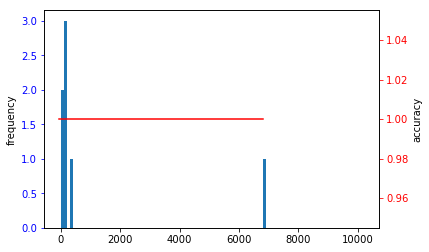

In [119]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.hist(pred, bins=102, range=(0, 10201), label="freq")
ax2.plot(ary[:,0], ary[:, 1], color="red", label="acc")
ax1.set_ylabel("frequency")
ax2.set_ylabel("accuracy")
ax1.tick_params(axis='y', colors="blue")
ax2.tick_params(axis='y', colors="red")

In [10]:
pred

array([   0.,    0., 6842.,  117.,  169.,  303.,  153.])

In [11]:
true

array([[    0.        ],
       [    0.        ],
       [16223.8664093 ],
       [ 4831.02557373],
       [ 8242.39453125],
       [  107.02740479],
       [ 4030.347229  ]])

In [46]:
ary = []
for i in range(102):
    w_idx = np.where((i*101 <= pred) & (pred < (i+1)*101))
    if len(w_idx[0]) > 0:
        w_pred = (pred[w_idx] > 0)
        w_true = (true[w_idx].reshape(-1) > 0)
        print(np.logical_and(w_pred, w_true))
        ary.extend([[i*101, x] for x in np.logical_and(w_pred, w_true).astype(int).tolist()])

[False False]
[ True  True  True]
[ True]
[ True]


In [59]:
print(ary)

[[50, 0.0], [151, 1.0], [353, 1.0], [6817, 1.0]]
